# Great Schools Web scraping using Python

## Introduction
GreatSchools is the leading nonprofit providing high-quality information that supports parents pursuing a great education for their child, schools striving for excellence, and communities working to diminish inequities in education. The website provides ratings and comparison tools based on student growth, college readiness, equity, and test scores for public schools in the U.S. Of all the school rating sites, GreatSchools is the only one that factors student progress — or growth — into its methodology. This is significant as research has shown growth data to provide a more accurate representation of student progress and school quality. As of July 2017, the GreatSchools database contains information for more than 138,000 public, private, and charter schools in the United States.

Our paper covers some basic information of school in New York, NY scraped from the website and the code to scrape it, including utilizing packages Selenium to get the data needed.


### I. Web scraping <a class="anchor" id="sub_section_1_1_1"></a>
Import the necessary libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np

Let's make a request and get the code of the whole page.

In [40]:
driver = webdriver.Chrome()
driver.get("https://www.greatschools.org/new-york/new-york/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=40.6906&locationType=city&lon=-73.9488&page=1&view=table")
driver.implicitly_wait(0.5)

In [5]:
driver.title

'New York Elementary Schools, 1-25 - New York, NY | GreatSchools'

Let's create the list of all the school data we scrape from website:

In [121]:
greatschool = []

Create variables of data needed from the website including basic information of schools, ratings and reviews.
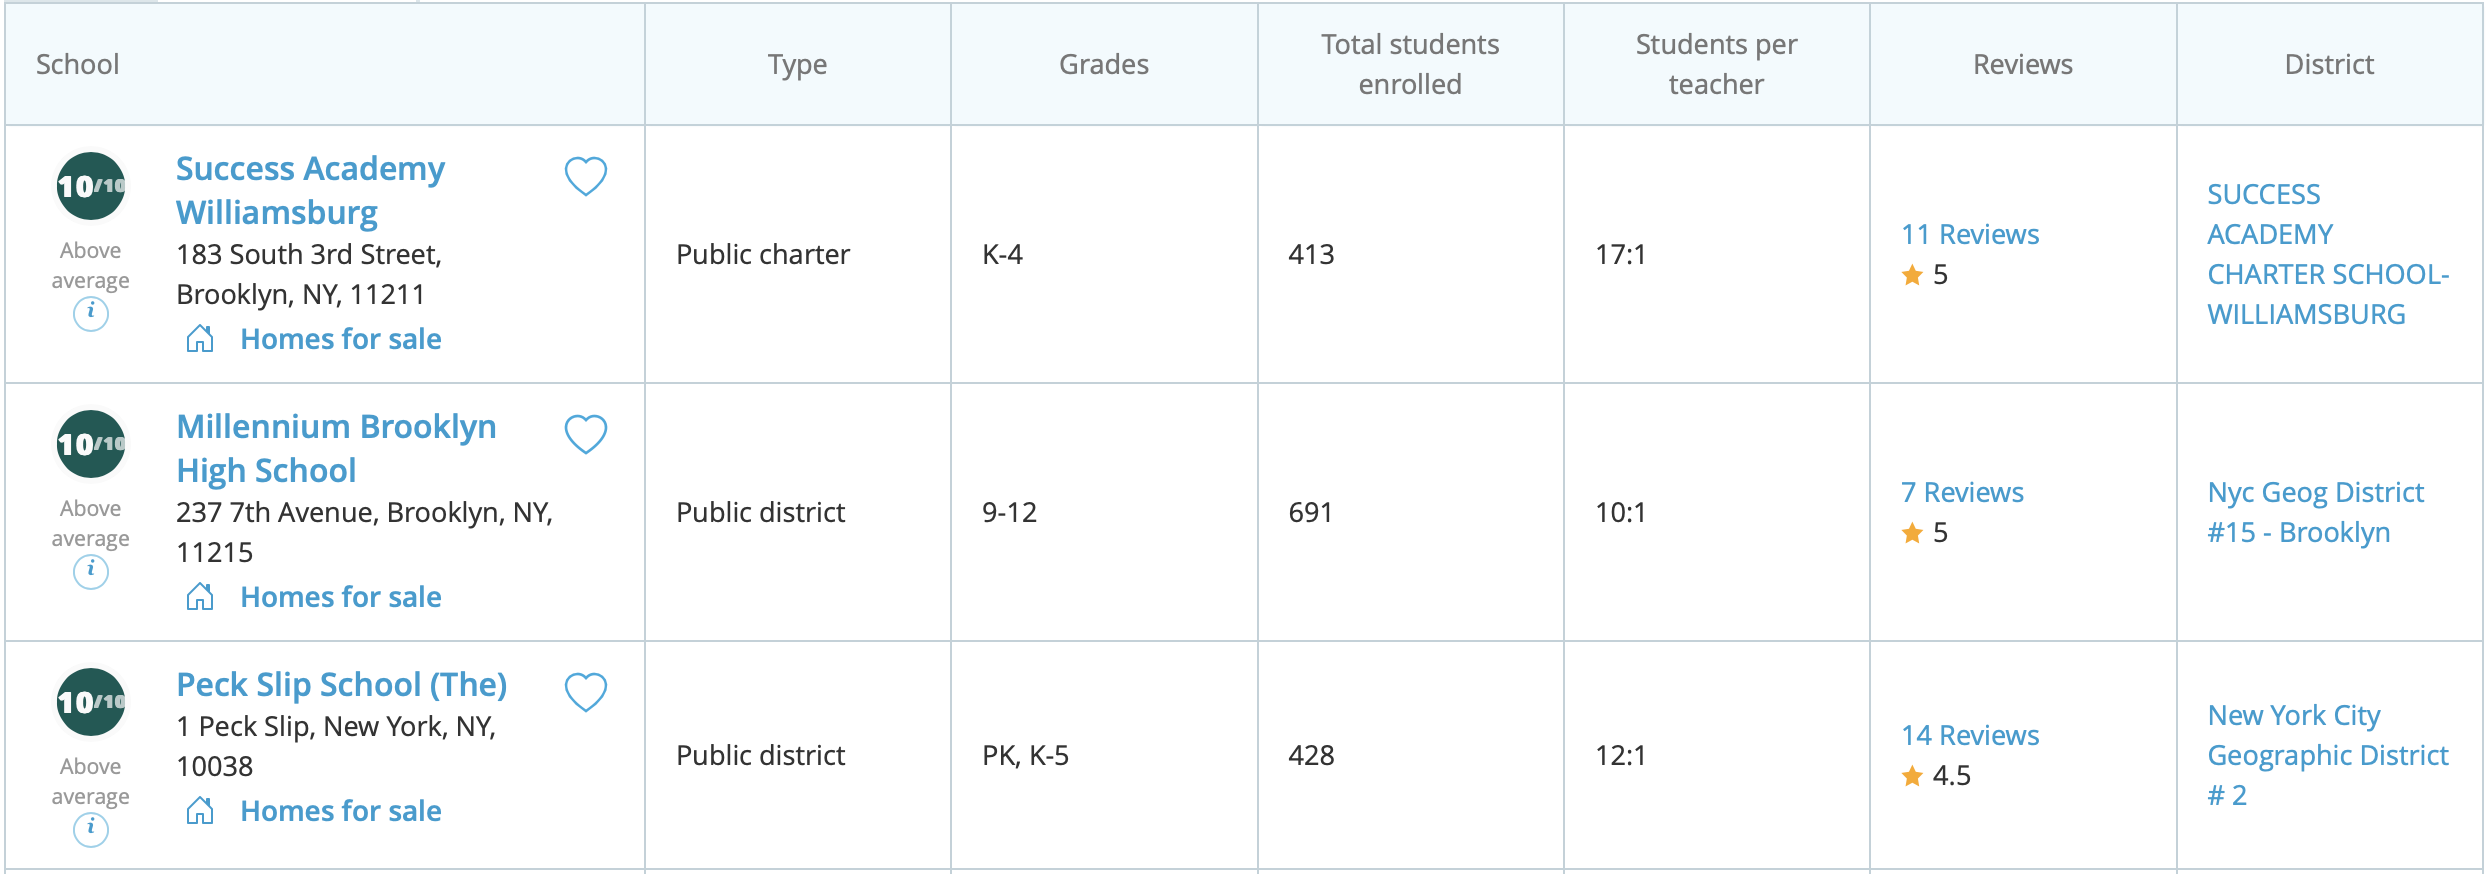
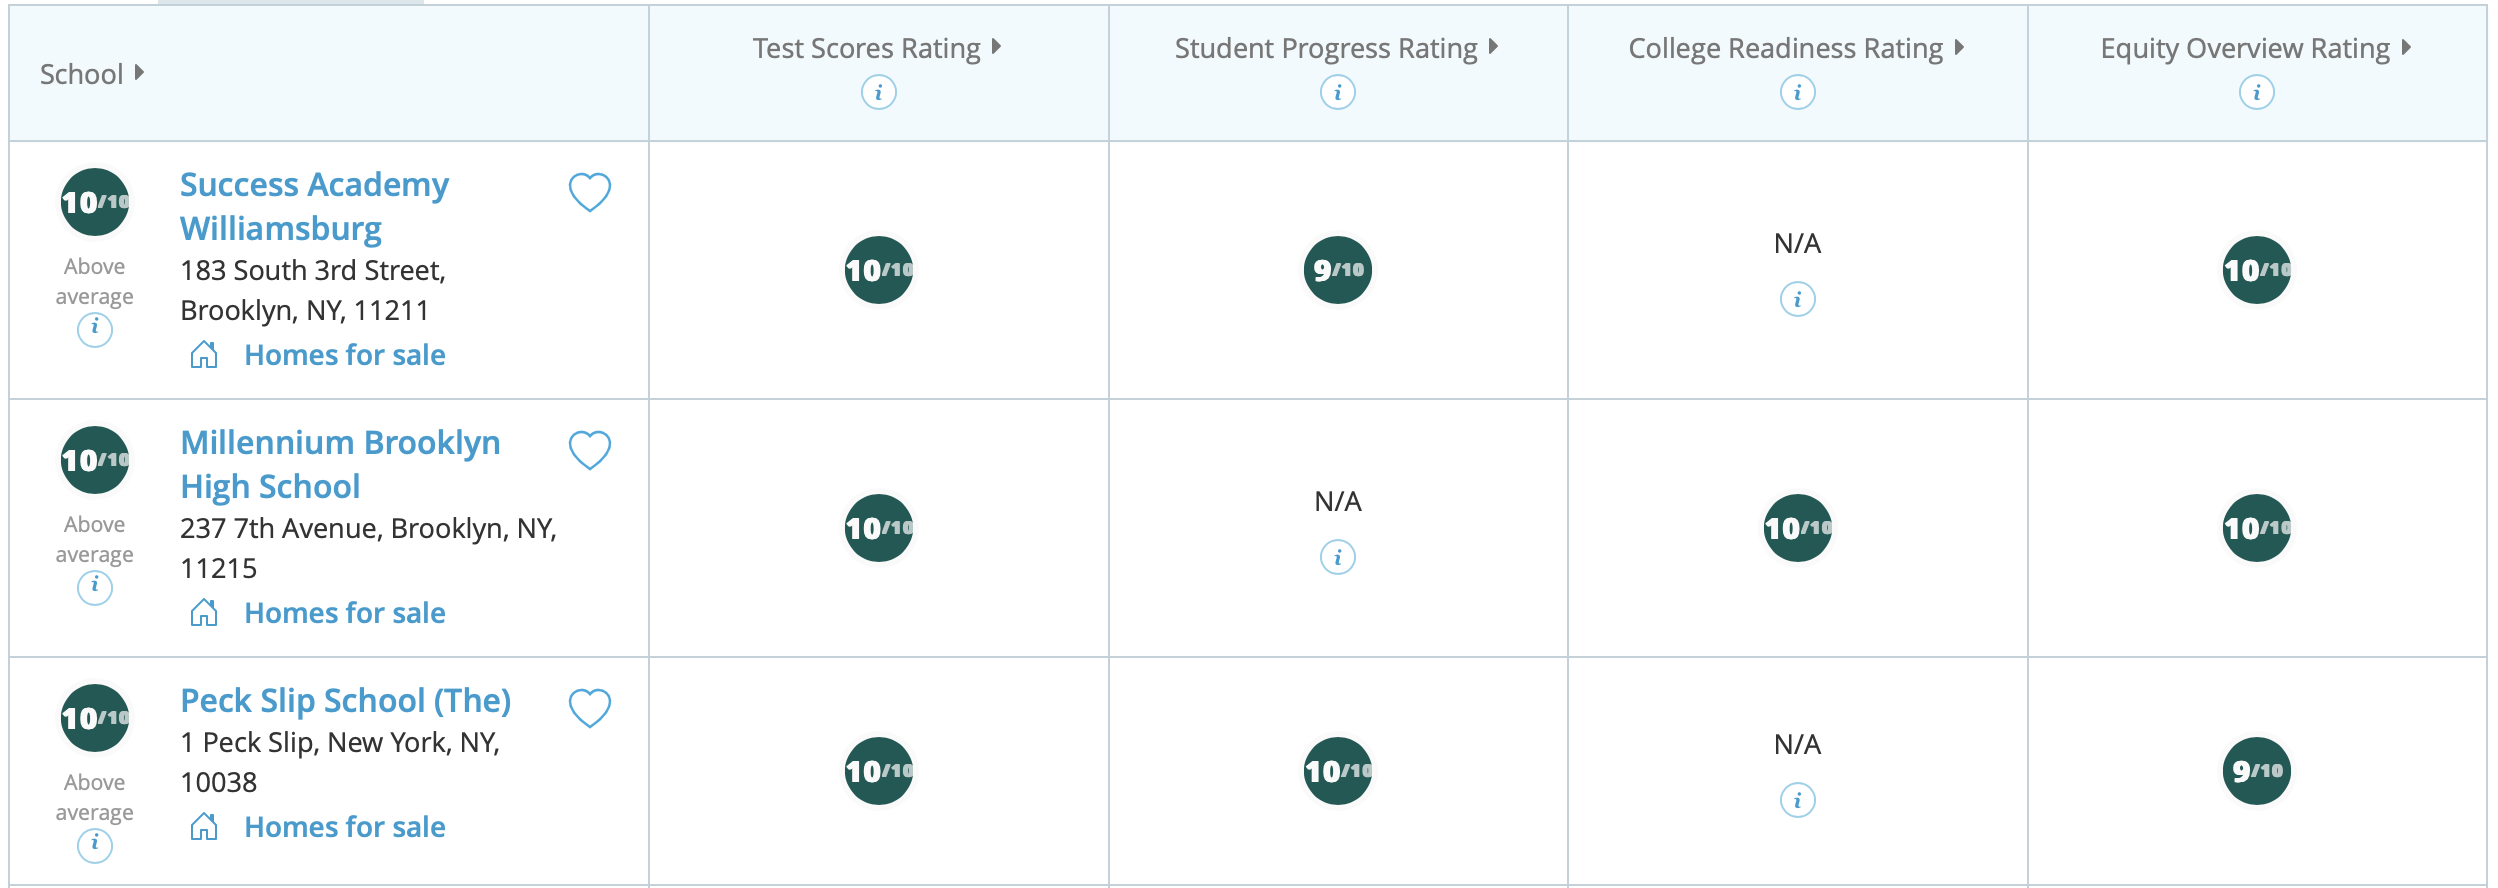

In [122]:
def gettable(page):
    url = f'https://www.greatschools.org/new-york/new-york/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=40.6906&locationType=city&lon=-73.9488&page={page}&view=table'
    driver = webdriver.Chrome()
    driver.get(url)
    table = driver.find_element(By.TAG_NAME, 'tbody')
    lists = table.find_elements(By.TAG_NAME, 'tr')
    for i in lists:
        info = {
            'School': i.find_element(By.TAG_NAME,'a').text,
            'Details': i.find_element(By.TAG_NAME,'a').get_attribute('href'),
            'Address': i.find_element(By.CLASS_NAME,"address").text,
            'Summary Rating': i.find_element(By.CSS_SELECTOR, '[class="rating-container"]').text.split('\n')[0],
            'Rating Class': i.find_element(By.CLASS_NAME,"scale").text,
            'Type': i.find_elements(By.TAG_NAME,'td')[1].text,
            'Grades': i.find_elements(By.TAG_NAME,'td')[2].text,
            'Total students enrolled': i.find_elements(By.TAG_NAME,'td')[3].text,
            'Students per teacher': i.find_elements(By.TAG_NAME,'td')[4].text,
            'Number of Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[0],
            'Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[-1],
        }
    driver.find_element(By.CSS_SELECTOR, '[aria-label="Academic"]').click()
    table1 = driver.find_element(By.TAG_NAME, 'tbody')
    lists1 = table1.find_elements(By.TAG_NAME, 'tr')
    for i in lists1:
        info.update({
            'Test Scores Rating': i.find_elements(By.TAG_NAME,'td')[1].text.split('\n')[0],
            'Student Progress Rating': i.find_elements(By.TAG_NAME,'td')[2].text.split('\n')[0],
            'College Readiness Rating': i.find_elements(By.TAG_NAME,'td')[3].text.split('\n')[0],
            'Equity Overview Rating': i.find_elements(By.TAG_NAME,'td')[4].text.split('\n')[0],
        })
        greatschool.append(info)
    return

We will get the first 20 pages of Schools list near New York, NY sorted by GreatSchools Rating with the school Level from elementary to high school. As each page contains data of 25 schools, we would scrape data from top 500 schools from website.

In [123]:
for x in range(1,21):
    gettable(x)

In [139]:
len(greatschool)

500

Now get some look at the preview of data we have scraped.

In [140]:
df = pd.DataFrame(greatschool)
df

,School,Details,Adress,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating
0,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8,N/A,10
1,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8,N/A,10
2,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8,N/A,10
3,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8,N/A,10
4,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8,N/A,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ps 5 Dr Ronald Mcnair,https://www.greatschools.org/new-york/brooklyn...,"820 Hancock Street, Brooklyn, NY, 11233",3,Below average,Public district,"PK, K-5 & Ungraded",213,11:1,5 Reviews,3.8,5,1,N/A,4
496,Ps 5 Dr Ronald Mcnair,https://www.greatschools.org/new-york/brooklyn...,"820 Hancock Street, Brooklyn, NY, 11233",3,Below average,Public district,"PK, K-5 & Ungraded",213,11:1,5 Reviews,3.8,5,1,N/A,4
497,Ps 5 Dr Ronald Mcnair,https://www.greatschools.org/new-york/brooklyn...,"820 Hancock Street, Brooklyn, NY, 11233",3,Below average,Public district,"PK, K-5 & Ungraded",213,11:1,5 Reviews,3.8,5,1,N/A,4
498,Ps 5 Dr Ronald Mcnair,https://www.greatschools.org/new-york/brooklyn...,"820 Hancock Street, Brooklyn, NY, 11233",3,Below average,Public district,"PK, K-5 & Ungraded",213,11:1,5 Reviews,3.8,5,1,N/A,4


### II. Data Cleaning 
The dataframe is maybe not in the format we want. To clean it up, we should check columns format, table shape and null values.

In [141]:
df.shape

(500, 15)

In [150]:
df.replace('N/A', np.nan, inplace=True)
df.isnull().sum()

School                        0
Details                       0
Adress                        0
Summary Rating                0
Rating Class                  0
Type                          0
Grades                        0
Total students enrolled       0
Students per teacher          0
Number of Reviews             0
Reviews                       0
Test Scores Rating            0
Student Progress Rating     125
College Readiness Rating    325
Equity Overview Rating        0
dtype: int64

As we see, there are some null values in Student Progress Rating and College Readiness Rating.

In [157]:
df.dtypes

School                      object
Details                     object
Adress                      object
Summary Rating              object
Rating Class                object
Type                        object
Grades                      object
Total students enrolled     object
Students per teacher        object
Number of Reviews           object
Reviews                     object
Test Scores Rating          object
Student Progress Rating     object
College Readiness Rating    object
Equity Overview Rating      object
dtype: object

We should convert some columns into numeric format for data analysis easier.

In [161]:
df[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']]=df[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']].apply(pd.to_numeric)

In [163]:
df.dtypes

School                       object
Details                      object
Adress                       object
Summary Rating                int64
Rating Class                 object
Type                         object
Grades                       object
Total students enrolled       int64
Students per teacher         object
Number of Reviews            object
Reviews                     float64
Test Scores Rating            int64
Student Progress Rating     float64
College Readiness Rating    float64
Equity Overview Rating        int64
dtype: object

### III. Export and Data summary <a class="anchor" id="sub_section_1_1_1"></a>

In [164]:
df.to_csv('Top 500 Schools in New York, NY | GreatSchools.csv')

This is dataset: 
- Dataset Structure: 500 observations (rows), 15 features (variables)
- Missing Data: 450 missing data total in all columns
- Data Type: two datatypes in this dataset: objects and integers


| Column | Description | 
| :---: | :--- |
| School | Name of school in the list. |
| Details | Link to the detailed school information and reviews. |
| Address | Address of the school. |
| Summary Rating | an overall snapshot of school quality. Ratings follow a 1-10 scale, where top-rated schools are "10s". |
| Rating Class | Ratings between 1-4 signal “below average”; 5-6 indicate “average”; ratings of 7-10 are “above average” |
| Type | School Type including: Public district, Public Charter, Private. |
| Grades | Grade or school level the school providing. |
| Total students enrolled | Total number of all students enrolled in a campuses of a school as the last update. |
| Students per teacher | The number of students who attend a school divided by the number of teachers in the institution. |
| Number of Reviews | Number of reviews from current students or parent/guardians. |
| Reviews | Overall school rate from current students or parent/guardians. |
| Test Scores Rating | Reflect annual state test results for this school compared with scores statewide. |
| Student Progress Rating | Comparing the academic progress over time for this school to all schools in the state, using student growth data provided by the state Department of Education. |
| College Readiness Rating | This shows how well students at this school are prepared for college compared to students at other schools in this state, based on key measures, like graduation rates, college entrance tests and AP coursework when available. |
| Equity Overview Rating | This looks at how well this school is serving the needs of its disadvantaged students relative to all its students, compared to other schools in the state, based on test scores provided from the state Department of Education. |

In [2]:
driver = webdriver.Chrome()
driver.get("https://www.greatschools.org/massachusetts/cambridge/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=42.3742&locationType=city&lon=-71.1129&view=table")
driver.implicitly_wait(0.5)

In [3]:
driver.title

'Cambridge Elementary Schools, 1-25 - Cambridge, MA | GreatSchools'

In [4]:
greatschool1 = []

In [5]:
def gettable(page):
    url = f'https://www.greatschools.org/massachusetts/cambridge/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=42.3742&locationType=city&lon=-71.1129&page={page}&view=table'
    driver = webdriver.Chrome()
    driver.get(url)
    table = driver.find_element(By.TAG_NAME, 'tbody')
    lists = table.find_elements(By.TAG_NAME, 'tr')
    for i in lists:
        info = {
            'School': i.find_element(By.TAG_NAME,'a').text,
            'Details': i.find_element(By.TAG_NAME,'a').get_attribute('href'),
            'Address': i.find_element(By.CLASS_NAME,"address").text,
            'Summary Rating': i.find_element(By.CSS_SELECTOR, '[class="rating-container"]').text.split('\n')[0],
            'Rating Class': i.find_element(By.CLASS_NAME,"scale").text,
            'Type': i.find_elements(By.TAG_NAME,'td')[1].text,
            'Grades': i.find_elements(By.TAG_NAME,'td')[2].text,
            'Total students enrolled': i.find_elements(By.TAG_NAME,'td')[3].text,
            'Students per teacher': i.find_elements(By.TAG_NAME,'td')[4].text,
            'Number of Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[0],
            'Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[-1],
        }
    driver.find_element(By.CSS_SELECTOR, '[aria-label="Academic"]').click()
    table1 = driver.find_element(By.TAG_NAME, 'tbody')
    lists1 = table1.find_elements(By.TAG_NAME, 'tr')
    for i in lists1:
        info.update({
            'Test Scores Rating': i.find_elements(By.TAG_NAME,'td')[1].text.split('\n')[0],
            'Student Progress Rating': i.find_elements(By.TAG_NAME,'td')[2].text.split('\n')[0],
            'College Readiness Rating': i.find_elements(By.TAG_NAME,'td')[3].text.split('\n')[0],
            'Equity Overview Rating': i.find_elements(By.TAG_NAME,'td')[4].text.split('\n')[0],
        })
        greatschool1.append(info)
    return

In [ ]:
for x in range(1,15):
    gettable(x)

In [9]:
len(greatschool1)

337

In [11]:
df1 = pd.DataFrame(greatschool1)
df1.head()

,School,Details,Address,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating
0,J.R. Lowell Elementary School,https://www.greatschools.org/massachusetts/wat...,"175 Orchard Street, Watertown, MA, 02472",8,Above average,Public district,"PK, K-5",401,11:1,13 Reviews,3.6,8,10,N/A,4
1,J.R. Lowell Elementary School,https://www.greatschools.org/massachusetts/wat...,"175 Orchard Street, Watertown, MA, 02472",8,Above average,Public district,"PK, K-5",401,11:1,13 Reviews,3.6,8,10,N/A,4
2,J.R. Lowell Elementary School,https://www.greatschools.org/massachusetts/wat...,"175 Orchard Street, Watertown, MA, 02472",8,Above average,Public district,"PK, K-5",401,11:1,13 Reviews,3.6,8,10,N/A,4
3,J.R. Lowell Elementary School,https://www.greatschools.org/massachusetts/wat...,"175 Orchard Street, Watertown, MA, 02472",8,Above average,Public district,"PK, K-5",401,11:1,13 Reviews,3.6,8,10,N/A,4
4,J.R. Lowell Elementary School,https://www.greatschools.org/massachusetts/wat...,"175 Orchard Street, Watertown, MA, 02472",8,Above average,Public district,"PK, K-5",401,11:1,13 Reviews,3.6,8,10,N/A,4


In [12]:
df1.shape

(337, 15)

In [22]:
df1.replace('N/A', np.nan, inplace=True)
df1.replace('Currently unrated', np.nan, inplace=True)
df1['Reviews'].replace('0 Reviews', np.nan, inplace=True)
df1.isnull().sum()

School                        0
Details                       0
Address                       0
Summary Rating              187
Rating Class                187
Type                          0
Grades                        0
Total students enrolled      75
Students per teacher        187
Number of Reviews             0
Reviews                      87
Test Scores Rating          237
Student Progress Rating     237
College Readiness Rating    262
Equity Overview Rating      212
dtype: int64

In [23]:
df1.dtypes

School                      object
Details                     object
Address                     object
Summary Rating              object
Rating Class                object
Type                        object
Grades                      object
Total students enrolled     object
Students per teacher        object
Number of Reviews           object
Reviews                     object
Test Scores Rating          object
Student Progress Rating     object
College Readiness Rating    object
Equity Overview Rating      object
dtype: object

In [24]:
df1[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']]=df1[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']].apply(pd.to_numeric)

In [25]:
df1.dtypes

School                       object
Details                      object
Address                      object
Summary Rating              float64
Rating Class                 object
Type                         object
Grades                       object
Total students enrolled     float64
Students per teacher         object
Number of Reviews            object
Reviews                     float64
Test Scores Rating          float64
Student Progress Rating     float64
College Readiness Rating    float64
Equity Overview Rating      float64
dtype: object

In [26]:
df = pd.read_csv("/Users/thanhhai/Documents/Top 500 Schools in New York, NY | GreatSchools.csv")
df.head()

,Unnamed: 0,School,Details,Adress,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating
0,0,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8.0,NaN,10
1,1,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8.0,NaN,10
2,2,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8.0,NaN,10
3,3,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8.0,NaN,10
4,4,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9,Above average,Public charter,K-8,702,10:1,3 Reviews,2.7,8,8.0,NaN,10


In [27]:
df = df.drop('Unnamed: 0', axis=1)

In [28]:
df.shape

(500, 15)

In [31]:
driver = webdriver.Chrome()
driver.get("https://www.greatschools.org/california/stanford/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=37.426&locationType=city&lon=-122.167&view=table")
driver.implicitly_wait(0.5)

In [32]:
driver.title

'Stanford Elementary Schools, 1-25 - Stanford, CA | GreatSchools'

In [33]:
greatschool2 = []

In [34]:
def gettable(page):
    url = f'https://www.greatschools.org/california/stanford/schools/?distance=5&gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&lat=37.426&locationType=city&lon=-122.167&page={page}&view=table'
    driver = webdriver.Chrome()
    driver.get(url)
    table = driver.find_element(By.TAG_NAME, 'tbody')
    lists = table.find_elements(By.TAG_NAME, 'tr')
    for i in lists:
        info = {
            'School': i.find_element(By.TAG_NAME,'a').text,
            'Details': i.find_element(By.TAG_NAME,'a').get_attribute('href'),
            'Address': i.find_element(By.CLASS_NAME,"address").text,
            'Summary Rating': i.find_element(By.CSS_SELECTOR, '[class="rating-container"]').text.split('\n')[0],
            'Rating Class': i.find_element(By.CLASS_NAME,"scale").text,
            'Type': i.find_elements(By.TAG_NAME,'td')[1].text,
            'Grades': i.find_elements(By.TAG_NAME,'td')[2].text,
            'Total students enrolled': i.find_elements(By.TAG_NAME,'td')[3].text,
            'Students per teacher': i.find_elements(By.TAG_NAME,'td')[4].text,
            'Number of Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[0],
            'Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[-1],
        }
    driver.find_element(By.CSS_SELECTOR, '[aria-label="Academic"]').click()
    table1 = driver.find_element(By.TAG_NAME, 'tbody')
    lists1 = table1.find_elements(By.TAG_NAME, 'tr')
    for i in lists1:
        info.update({
            'Test Scores Rating': i.find_elements(By.TAG_NAME,'td')[1].text.split('\n')[0],
            'Student Progress Rating': i.find_elements(By.TAG_NAME,'td')[2].text.split('\n')[0],
            'College Readiness Rating': i.find_elements(By.TAG_NAME,'td')[3].text.split('\n')[0],
            'Equity Overview Rating': i.find_elements(By.TAG_NAME,'td')[4].text.split('\n')[0],
        })
        greatschool2.append(info)
    return

In [35]:
for x in range(1,7):
    gettable(x)

In [36]:
len(greatschool2)

150

In [37]:
df3 = pd.DataFrame(greatschool2)
df3.head()

,School,Details,Address,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating
0,Barron Park Elementary School,https://www.greatschools.org/california/palo-a...,"800 Barron Avenue, Palo Alto, CA, 94306",7,Above average,Public district,K-5,203,11:1,25 Reviews,4.9,9,8,N/A,4
1,Barron Park Elementary School,https://www.greatschools.org/california/palo-a...,"800 Barron Avenue, Palo Alto, CA, 94306",7,Above average,Public district,K-5,203,11:1,25 Reviews,4.9,9,8,N/A,4
2,Barron Park Elementary School,https://www.greatschools.org/california/palo-a...,"800 Barron Avenue, Palo Alto, CA, 94306",7,Above average,Public district,K-5,203,11:1,25 Reviews,4.9,9,8,N/A,4
3,Barron Park Elementary School,https://www.greatschools.org/california/palo-a...,"800 Barron Avenue, Palo Alto, CA, 94306",7,Above average,Public district,K-5,203,11:1,25 Reviews,4.9,9,8,N/A,4
4,Barron Park Elementary School,https://www.greatschools.org/california/palo-a...,"800 Barron Avenue, Palo Alto, CA, 94306",7,Above average,Public district,K-5,203,11:1,25 Reviews,4.9,9,8,N/A,4


In [38]:
df3.replace('N/A', np.nan, inplace=True)
df3.replace('Currently unrated', np.nan, inplace=True)
df3['Reviews'].replace('0 Reviews', np.nan, inplace=True)
df3.isnull().sum()

School                        0
Details                       0
Address                       0
Summary Rating              100
Rating Class                100
Type                          0
Grades                        0
Total students enrolled      25
Students per teacher        100
Number of Reviews             0
Reviews                      75
Test Scores Rating          100
Student Progress Rating     100
College Readiness Rating    150
Equity Overview Rating      100
dtype: int64

In [39]:
df3[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']]=df3[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']].apply(pd.to_numeric)

In [40]:
df2 = pd.concat([df, df1, df3])
df2.head()

,School,Details,Adress,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating,Address
0,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
1,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
2,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
3,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
4,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN


In [41]:
df2.shape

(987, 16)

In [42]:
df2.rename(columns={'Details':'Link', 'Adress':'Address'}, inplace=True)

In [43]:
df2.insert(0, 'Data source', 'www.greatschools.org')
df2.insert(1, 'Agent', 'MaiPhuong')
df2.head()

,Data source,Agent,School,Link,Address,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating,Address
0,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
1,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
2,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
3,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
4,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN


In [44]:
df2.to_csv('GreatSchools.csv')

In [4]:
greatschool2 = []

In [5]:
def gettable(location,page):
    url = f'https://www.greatschools.org/{location}/schools/?gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&page={page}&view=table'
    driver = webdriver.Chrome()
    driver.get(url)
    table = driver.find_element(By.TAG_NAME, 'tbody')
    lists = table.find_elements(By.TAG_NAME, 'tr')
    for i in lists:
        info = {
            'Data source': url[8:],
            'Agent': 'MaiPhuong',
            'School': i.find_element(By.TAG_NAME,'a').text,
            'Link': i.find_element(By.TAG_NAME,'a').get_attribute('href'),
            'Address': i.find_element(By.CLASS_NAME,"address").text,
            'Summary Rating': i.find_element(By.CSS_SELECTOR, '[class="rating-container"]').text.split('\n')[0],
            'Rating Class': i.find_element(By.CLASS_NAME,"scale").text,
            'Type': i.find_elements(By.TAG_NAME,'td')[1].text,
            'Grades': i.find_elements(By.TAG_NAME,'td')[2].text,
            'Total students enrolled': i.find_elements(By.TAG_NAME,'td')[3].text,
            'Students per teacher': i.find_elements(By.TAG_NAME,'td')[4].text,
            'Number of Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[0],
            'Reviews': i.find_elements(By.TAG_NAME,'td')[5].text.split('\n')[-1],
        }
    driver.find_element(By.CSS_SELECTOR, '[aria-label="Academic"]').click()
    table1 = driver.find_element(By.TAG_NAME, 'tbody')
    lists1 = table1.find_elements(By.TAG_NAME, 'tr')
    for i in lists1:
        info.update({
            'Test Scores Rating': i.find_elements(By.TAG_NAME,'td')[1].text.split('\n')[0],
            'Student Progress Rating': i.find_elements(By.TAG_NAME,'td')[2].text.split('\n')[0],
            'College Readiness Rating': i.find_elements(By.TAG_NAME,'td')[3].text.split('\n')[0],
            'Equity Overview Rating': i.find_elements(By.TAG_NAME,'td')[4].text.split('\n')[0],
        })
        greatschool2.append(info)
    return

In [6]:
for x in range(1,5):
    gettable('delaware/wilmington',x)

In [7]:
for x in range(1,7):
    gettable('california/san-francisco',x)

In [8]:
for x in range(1,4):
    gettable('washington/vancouver',x)

In [9]:
for x in range(1,7):
    gettable('wisconsin/milwaukee',x)

In [11]:
for x in range(1,10):
    gettable('louisiana/new-orleans',x)

In [13]:
for x in range(1,10):
    gettable('florida/orlando',x)

In [12]:
for x in range(1,10):
    gettable('arizona/phoenix',x)

In [16]:
for x in range(1,10):
    gettable('florida/miami',x)

In [21]:
for x in range(1,10):
    gettable('texas/houston',x)

In [25]:
for x in range(1,10):
    gettable('texas/dallas',x)

In [26]:
for x in range(1,10):
    gettable('massachusetts/boston',x)

In [28]:
for x in range(1,10):
    gettable('texas/austin',x)

In [31]:
for x in range(1,10):
    gettable('michigan/detroit',x)

In [32]:
for x in range(1,10):
    gettable('michigan/grand-rapids',x)

In [35]:
for x in range(1,10):
    gettable('tennessee/nashville/',x)

In [36]:
for x in range(1,10):
    gettable('california/oakland',x)

In [37]:
for x in range(1,10):
    gettable('california/sacramento',x)

In [40]:
len(greatschool2)

4497

In [41]:
df3 = pd.DataFrame(greatschool2)
df3.head()

,Data source,Agent,School,Link,Address,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating
0,www.greatschools.org/delaware/wilmington/schoo...,MaiPhuong,Brandywine High School,https://www.greatschools.org/delaware/wilmingt...,"1400 Foulk Road, Wilmington, DE, 19803",4,Below average,Public district,9-12,940,13:1,2 Reviews,4.5,N/A,N/A,7,1
1,www.greatschools.org/delaware/wilmington/schoo...,MaiPhuong,Brandywine High School,https://www.greatschools.org/delaware/wilmingt...,"1400 Foulk Road, Wilmington, DE, 19803",4,Below average,Public district,9-12,940,13:1,2 Reviews,4.5,N/A,N/A,7,1
2,www.greatschools.org/delaware/wilmington/schoo...,MaiPhuong,Brandywine High School,https://www.greatschools.org/delaware/wilmingt...,"1400 Foulk Road, Wilmington, DE, 19803",4,Below average,Public district,9-12,940,13:1,2 Reviews,4.5,N/A,N/A,7,1
3,www.greatschools.org/delaware/wilmington/schoo...,MaiPhuong,Brandywine High School,https://www.greatschools.org/delaware/wilmingt...,"1400 Foulk Road, Wilmington, DE, 19803",4,Below average,Public district,9-12,940,13:1,2 Reviews,4.5,N/A,N/A,7,1
4,www.greatschools.org/delaware/wilmington/schoo...,MaiPhuong,Brandywine High School,https://www.greatschools.org/delaware/wilmingt...,"1400 Foulk Road, Wilmington, DE, 19803",4,Below average,Public district,9-12,940,13:1,2 Reviews,4.5,N/A,N/A,7,1


In [42]:
df3.replace('N/A', np.nan, inplace=True)
df3.replace('Currently unrated', np.nan, inplace=True)
df3['Reviews'].replace('0 Reviews', np.nan, inplace=True)
df3.isnull().sum()

Data source                    0
Agent                          0
School                         0
Link                           0
Address                        0
Summary Rating              1522
Rating Class                1522
Type                           0
Grades                         0
Total students enrolled      455
Students per teacher        1434
Number of Reviews              0
Reviews                      999
Test Scores Rating          1937
Student Progress Rating     2047
College Readiness Rating    3847
Equity Overview Rating      1772
dtype: int64

In [43]:
df3[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']]=df3[['Summary Rating','Total students enrolled','Reviews','Test Scores Rating','Student Progress Rating','College Readiness Rating','Equity Overview Rating']].apply(pd.to_numeric)

In [44]:
df = pd.read_csv("/Users/thanhhai/Documents/ISODS/GreatSchools.csv")
df.head()

,Unnamed: 0,Data source,Agent,School,Link,Address,Summary Rating,Rating Class,Type,Grades,Total students enrolled,Students per teacher,Number of Reviews,Reviews,Test Scores Rating,Student Progress Rating,College Readiness Rating,Equity Overview Rating,Address.1
0,0,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
1,1,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
2,2,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
3,3,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN
4,4,www.greatschools.org,MaiPhuong,Bedford Stuyvesant New Beginnings Charter School,https://www.greatschools.org/new-york/brooklyn...,"82 Lewis Avenue, Brooklyn, NY, 11206",9.0,Above average,Public charter,K-8,702.0,10:1,3 Reviews,2.7,8.0,8.0,NaN,10.0,NaN


In [46]:
df2 = pd.concat([df, df3])
df2.shape

(5484, 19)

In [47]:
df.to_csv('GreatSchool.csv')